# Linear Classifier
### Goal of Lesson
- Learn about Supervised Learning
- Explore how to use it for classification
- Understand Perceptron Classifier
- Use Perceptron as a linear classifier

 ## Supervised Learning
 - Given a dataset of input-output pairs, learn a function to map inputs to outputs
 - There are different tasks - but we start to focus on **Classification**
 
 
 ### Classification
 
 - Supervised learning task of learning a function mapping an input point to a descrete category

### Example
- Predict if it is going to rain or not
- We have historical data to train our model

| Date       | Humidity  | Pressure  | Rain      |
| :--------- |:---------:| ---------:| :---------|
| Jan. 1     | 93%       | 999.7     | Rain      |
| Jan. 2     | 49%       | 1015.5    | No Rain   |
| Jan. 3     | 79%       | 1031.1    | No Rain   |
| Jan. 4     | 65%       | 984.9     | Rain      |
| Jan. 5     | 90%       | 975.2     | Rain      |

- This is supervised learning as it has the label

### The task of Supervised Learning
- Simply explained, the task of from the example above, is to find a funcion $f$ as follows.

**Ideally**: $f(humidity, pressure)$

Examples:
- $f(93, 999.7) =$ Rain
- $f(49, 1015.5) =$ No Rain
- $f(79, 1031.1 =$ No Rain

**Goal**: Approximate the function $f$ - the approximation function is often denoted $h$

### Linear Classifier
- A linear classifier makes classification decision based on the value of a linear combination of the characteristics. ([wiki](https://en.wikipedia.org/wiki/Linear_classifier))

![Linear Classifier](img/linear_classifier.png)

### Linear Classifier (math)
- $x_1$: Humidity
- $x_2$: Pressure
- $h(x_1, x_2) = w_0 + w_1 x_1 + w_2 x_2$

### Differently
- Weight vector $w: (w_0, w_1, w_2)$
- Input vector $x: (1, x_1, x_2)$
- Function ([dot-product](https://en.wikipedia.org/wiki/Dot_product)): $x\cdot w: w_0 + w_1 x_1 + w_2 x_2$
- $h_w(x) = w\cdot x$

### Perceptron Classifier
- Is a linear algorithm that can be applied to binary classification ([wiki](https://en.wikipedia.org/wiki/Perceptron))

### Perceptron Learning Rule
- Given data point $x, y$ update each weight according to
    - $w_i = w_i + \alpha(y - h_w(x))\times x_i$
    - $w_i = w_i + \alpha($actual value - estimate$)\times x_i$
        - $\alpha$: learning rate

> #### Programming Notes:
> - Libraries used
>     - [**pandas**](https://pandas.pydata.org) - a data analysis and manipulation tool
>     - [**numpy**](http://numpy.org) - scientific computing with Python ([Lecture on NumPy](https://youtu.be/BpzpU8_j0-c))
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
>     - [**sklearn**](https://scikit-learn.org/stable/) - tools for predictive data analysis
> - Functionality and concepts used
>     - [**CSV**](https://en.wikipedia.org/wiki/Comma-separated_values) file ([Lecture on CSV](https://youtu.be/LEyojSOg4EI))
>     - [**read_csv()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) read a comma-separated values (csv) file into **pandas** DataFrame.
>     - **List Comprehension** to convert data ([Lecture on **List Comprehension**](https://youtu.be/vCYEvtfXdig))
>     - [**isnull()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) Detect missing values
>     - [**sum()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) Return the sum of the values over the requested axis (can sum number of True-statements).
>     - [**dropna()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) clean the **pandas** DataFrame
>     - [**train_test_split**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from [**sklearn**](https://scikit-learn.org/stable/)
>     - [**Perceptron**](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) to train (fit) the model
>     - [**metrics.accuracy_score**](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) to get the accuracy of the predictions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

In [29]:
data = pd.read_csv('files/weather.csv', parse_dates=True)
data.info() # Date column이 몇 번 column인지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           3337 non-null   object 
 1   MinTemp        3334 non-null   float64
 2   MaxTemp        3335 non-null   float64
 3   Rainfall       3331 non-null   float64
 4   Evaporation    3286 non-null   float64
 5   Sunshine       3321 non-null   float64
 6   WindGustDir    2301 non-null   object 
 7   WindGustSpeed  2301 non-null   float64
 8   WindDir9am     3281 non-null   object 
 9   WindDir3pm     3304 non-null   object 
 10  WindSpeed9am   3311 non-null   float64
 11  WindSpeed3pm   3312 non-null   float64
 12  Humidity9am    3323 non-null   float64
 13  Humidity3pm    3324 non-null   float64
 14  Pressure9am    3317 non-null   float64
 15  Pressure3pm    3318 non-null   float64
 16  Cloud9am       2771 non-null   float64
 17  Cloud3pm       2776 non-null   float64
 18  Temp9am 

In [4]:
data = pd.read_csv('files/weather.csv', parse_dates=True, index_col=0)
data.info # datetime index

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes


In [5]:
data.isnull()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-02,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-03,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-04,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2008-02-05,False,False,False,True,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-06-22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2017-06-23,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### pandas.DataFrame.isnull

Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything elsegets mapped to False values.

Returns: DataFrame

In [6]:
# you can figure out how many of them are actually null
# project에서 사용할 예정
data.isnull().sum()

MinTemp             3
MaxTemp             2
Rainfall            6
Evaporation        51
Sunshine           16
WindGustDir      1036
WindGustSpeed    1036
WindDir9am         56
WindDir3pm         33
WindSpeed9am       26
WindSpeed3pm       25
Humidity9am        14
Humidity3pm        13
Pressure9am        20
Pressure3pm        19
Cloud9am          566
Cloud3pm          561
Temp9am             4
Temp3pm             4
RainToday           6
RISK_MM             0
RainTomorrow        0
dtype: int64

In [7]:
# float64 columns 선택 & 결측값 drop하기
dataset = data[['Humidity3pm', 'Pressure3pm', 'RainTomorrow']].dropna(axis=0)
dataset.info() # 3309 non-null, object(1)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3309 entries, 2008-02-01 to 2017-06-25
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity3pm   3309 non-null   float64
 1   Pressure3pm   3309 non-null   float64
 2   RainTomorrow  3309 non-null   object 
dtypes: float64(2), object(1)
memory usage: 103.4+ KB


In [8]:
X = dataset[['Humidity3pm', 'Pressure3pm']] # feature
y = dataset['RainTomorrow'] # target

#### object(1)

In [9]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
y = np.array([0 if value == 'No' else 1 for value in y])
y

array([1, 1, 1, ..., 0, 0, 0])

In [11]:
pd.Series(y).unique()

array([1, 0])

In [12]:
# random_state=42 : reproduce exact same train and test set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=42)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2481 entries, 2008-09-16 to 2017-02-11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity3pm  2481 non-null   float64
 1   Pressure3pm  2481 non-null   float64
dtypes: float64(2)
memory usage: 58.1 KB


In [14]:
clf = Perceptron(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

0.7403381642512077

In [15]:
# 원본 데이터에서 비가 안온 날의 비율
sum(y == 0)/len(y)

0.7407071622846781

In [16]:
X_data = X.to_numpy()
X_data[:, 0] # 분할 전 Humidity3pm

array([84., 73., 86., ..., 56., 35., 32.])

In [17]:
X_data[:, 1] # 분할 전 Pressure3pm

array([1017.4, 1016.4, 1015.6, ..., 1015. , 1015.1, 1015.4])

In [18]:
y # 0 or 1

array([1, 1, 1, ..., 0, 0, 0])

무슨 그림인가? Rune는 "this is how the real data should look like"라고 아래의 그림을 설명했다. 본인은 아래의 그림이 Humidity3pm와 Pressure3pm의 상관관계를 나타낸다고 생각한다. (단, 맞는지 틀린지 잘 모르겠다)

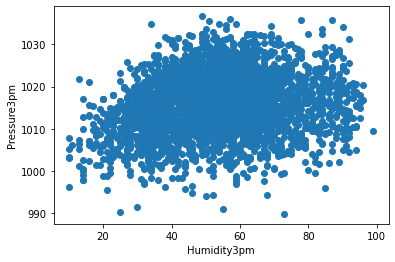

In [19]:
fig, ax = plt.subplots()

ax.scatter(x=X_data[:, 0], y=X_data[:, 1])
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure3pm')
plt.title('') 
plt.show()

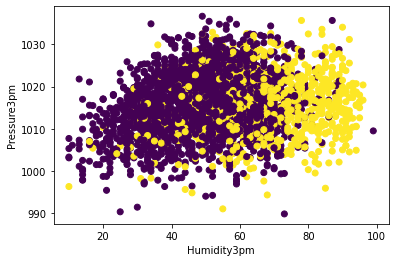

In [20]:
fig, ax = plt.subplots()

ax.scatter(x=X_data[:, 0], y=X_data[:, 1], c=y)
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure3pm')
plt.title('') 
plt.show()

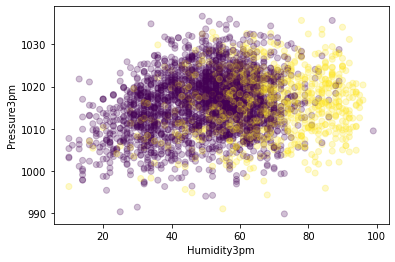

In [21]:
fig, ax = plt.subplots()

ax.scatter(x=X_data[:, 0], y=X_data[:, 1], c=y, alpha=.25)
plt.xlabel('Humidity3pm')
plt.ylabel('Pressure3pm')
plt.title('') 
plt.show()

strict line 
the linear classifier says we are going to
draw a line and this is what it 
took as the optimal line.

In [22]:
X_data # ['Humidity3pm','Pressure3pm']

array([[  84. , 1017.4],
       [  73. , 1016.4],
       [  86. , 1015.6],
       ...,
       [  56. , 1015. ],
       [  35. , 1015.1],
       [  32. , 1015.4]])

In [23]:
X_data[:, 0]

array([84., 73., 86., ..., 56., 35., 32.])

In [24]:
X_data[:, 1]

array([1017.4, 1016.4, 1015.6, ..., 1015. , 1015.1, 1015.4])

In [25]:
y_all = clf.predict(X_data)
y_all # 학습용 + 검증용에 대한 예측값

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0])

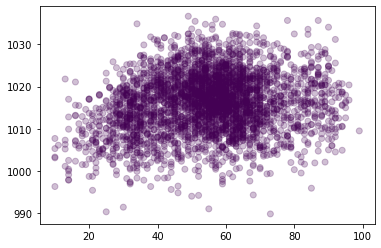

In [26]:
fig, ax = plt.subplots()

ax.scatter(x=X_data[:,0], y=X_data[:,1], c=y_all, alpha=.25)

# plt.title("Visually showing how all the data is predicted by our model.")
# yellow : denotes which class? 
# purple : denotes which class?


# color가 두개 나오지 않는다.
# y_all의 값이 모두 같다는 의미인지 확인해보자.

In [27]:
pd.Series(y_all).unique() # y_all의 값이 모두 같으면 아래 그림과 같은 scatter plot이 그려진다. 

array([0])

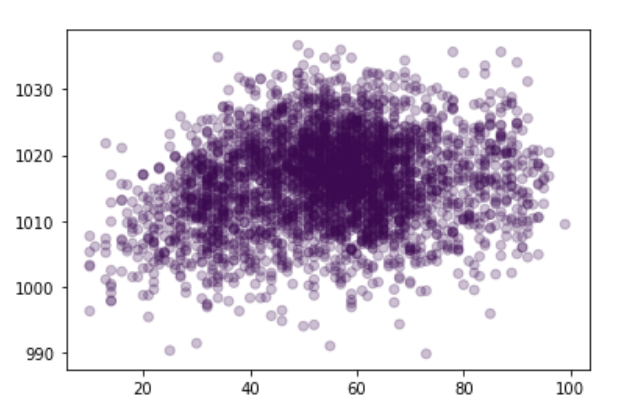

"X does not have valid feature names, but Perceptron was fitted with feature names"이 y_all을 모두 0으로 만들었는가? 